## <font color='darkblue'>Section2 - Bias-Variance Trade-off</font>
This course is from Udemy <b>["Ensemble Machine Learning in Python"](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/)</b>. This section is coming from [here](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6239838#overview).
* [Bias-Variance Key Terms](#seg1)
* [Bias-Variance Trade Off](#seg2)
* [Bias-Variance Decomposition](#seg3)
* [Polynomial Regression Demo](#seg4)
* [K-Nearest Neighbor and Decision Tree Demo](#seg5)
* [Cross-Validation as a Method for Optimizing Model Ccomplexity](#seg6)

<a id='seg1'></a>
## <font color='darkblue'>Bias-Variance Key Terms</font>
* This section: bias-variance trade-off
* This lecture: key terms
    * Bias
    * Variance
    * Irreducible error    
    
<img style="float:left" src="images/S2_5-0.PNG">
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

### <font color='darkgreen'>Irreducible error</font>
* Data-generating process are noisy
* Noise is by definition random (not deterministic)
* Can't predict its values, only its statistics (like mean & variance)
* Example:
    * We are in charge of the data-generating process
    * F(x) = 2x + 1
    * Linear regression
    * If a machine learning guy is working on our data, we can give him this function, his work is done.
* But linear regression model is: y = ax + b + ε
* In the past, we've written code to generate such data.
![data with noise](images/S2_5-1.PNG)
<br/>

* f_hat(x) = 2x + 1 doesn't achieve 0 error on y = 2x + 1 + ε
* ε ~ N(0, σ^2)

### <font color='darkgreen'>Bias</font>
* Another use for the word "bias": the "b" term in ax + b
* That's NOT what we mean here
* Bias here refers to the delta between your average model and the true f(x)
* Some sources refer to the square of this as bias, we won't.

### <font color='darkgreen'>Variance</font>
* Variance from statistics = how much a random variable deviates from its mean in squared units
* Variance in the context of bias-variance trade-off is more specific.
* Variance = statistical variance of predictor over all possible training sets. Ex.
    * Suppose we have a model that overfits - gets perfect for any training set
    * Then the models for each training set are probably very different from each other.
* Has nothing to do with accuracy
* Variance just measures how inconsistent a predictor is, over different training sets.
* Remember: goal is not to achieve lowest possible error.
* Being close to training points is only a proxy solution.

### <font color='darkgreen'>Model Complexity</font>
* Variance is a proxy for model complexity
* Complexity is a malleable term
* Can mean different things for different classifiers
* Ex. deep decision tree = complex, shallow decision tree = not complex
* Ex. K-Nearest Neighbor: K=1 = complex, K = 50 = not complex
* What about linear models?
* You might think: one line is no more complex than any other line
* What about regularization? (which prevents overfitting)
* Encourages weights to be small or 0
* Thus decreasing the model's complexity.
* You might assume linear models are not complex because nonlinear models are more "expressive"
* Linear doesn't necessarily mean not complex
* Large D linear model can be more complex than small D nonlinear model
* "Complexity" not a universal measurement.

<a id='seg2'></a>
## <font color='darkblue'>Bias-Variance Trade Off</font>
* In ML, we strive to minimize error
* We've already seen the best we can do is the irreducible error
* i.e. can't be reduced further
* Achieve this when we know true f(x)
* In this case, the reducible part of the error is 0
* Overall error is a combination of:
    * Bias
    * Variance
    * Irreducible error
* Goal is then to make bias and variance as small as possible
* What's the problem?
* It's a "trade-off"
* We need to balance these
* When we lower one, the other increases!
![data with noise](images/S2_5-2.PNG)
<br/>
* We've seen above chart in the context of overfitting.
* Overfit: bias goes down, variance goes up
* Underfit: bias goes up, variance goes down
* We want to minimize the SUM, consides with generalization error.
* Is it possible to achieve lower bias and lower variance at the same time?
* <b><font color='darkred'>Trade-off occurs in the context of altering the complexity of the same model</font></b>
* What if we combine models?

<a id='seg3'></a>
## <font color='darkblue'>Bias-Variance Decomposition</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6239852#overview))
* We will show: Expected error = bias^2 + variance + irreducible error
* Use mean-squared error for derivation for both regression and classification.
* Even though we don't use MSE for optimizing classifier.

### <font color='darkgreen'>Decomposition</font>
![data with noise](images/S2_7-1.PNG)
<br/>

### <font color='darkgreen'>Summary</font>
* We've shown that expected error is a combination of bias, variance, and irreducible error.
* Note: This is NOT just the error between the true f(x) and f_hat(x)
* We never observe f(x), we can only observe y!

<a id='seg4'></a>
## <font color='darkblue'>Polynomial Regression Demo</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6239854#overview))
Below sample code is from [bias_variance_demo.py](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/supervised_class2/bias_variance_demo.py):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

NUM_DATASETS = 50
''' Number of dataset'''
NOISE_VARIANCE = 0.5
MAX_POLY = 12
N = 25
''' Number of instance in dataset'''
Ntrain = int(0.9*N)
''' Number of instance for training '''
np.random.seed(2)

def make_poly(x, D):
    N = len(x)
    X = np.empty((N, D+1))
    for d in range(D+1):
        X[:,d] = x**d
        if d > 1:
            X[:,d] = (X[:,d] - X[:,d].mean()) / X[:,d].std()
        
    return X

def f(X):
    return np.sin(X)

In [2]:
x_axis = np.linspace(-np.pi, np.pi, 100)
y_axis = f(x_axis)
X = np.linspace(-np.pi, np.pi, N)
np.random.shuffle(X)
f_X = f(X)

Xpoly = make_poly(X, MAX_POLY)

In [3]:
Xpoly[:3]

array([[ 1.00000000e+00,  5.23598776e-01, -1.03452120e+00,
         1.08979689e-02, -7.52551709e-01,  3.52917865e-04,
        -6.08771063e-01,  1.06913264e-05, -5.26596432e-01,
         3.13441796e-07, -4.73096823e-01,  9.01912650e-09,
        -4.35410373e-01],
       [ 1.00000000e+00, -3.14159265e+00,  1.98283230e+00,
        -2.35396129e+00,  2.46858352e+00, -2.74428932e+00,
         2.76483920e+00, -2.99288716e+00,  2.95874122e+00,
        -3.15877113e+00,  3.08985433e+00, -3.27211249e+00,
         3.18008561e+00],
       [ 1.00000000e+00,  1.30899694e+00, -5.81918175e-01,
         1.70280765e-01, -6.57876451e-01,  3.44646353e-02,
        -5.91189631e-01,  6.52546779e-03, -5.23432184e-01,
         1.19568556e-03, -4.72534932e-01,  2.15032729e-04,
        -4.35311375e-01]])

Now we are going to train the model and get the variance, bias:

In [4]:
train_scores = np.zeros((NUM_DATASETS, MAX_POLY))
test_scores = np.zeros((NUM_DATASETS, MAX_POLY))
train_predictions = np.zeros((Ntrain, NUM_DATASETS, MAX_POLY))
prediction_curves = np.zeros((100, NUM_DATASETS, MAX_POLY))

model = LinearRegression()
for k in range(NUM_DATASETS):
    Y = f_X + np.random.randn(N)*NOISE_VARIANCE

    Xtrain = Xpoly[:Ntrain]
    Ytrain = Y[:Ntrain]

    Xtest = Xpoly[Ntrain:]
    Ytest = Y[Ntrain:]

    for d in range(MAX_POLY):
        model.fit(Xtrain[:,:d+2], Ytrain)
        predictions = model.predict(Xpoly[:,:d+2])

        # debug
        x_axis_poly = make_poly(x_axis, d+1)
        prediction_axis = model.predict(x_axis_poly)
    
        prediction_curves[:,k,d] = prediction_axis

        train_prediction = predictions[:Ntrain]
        test_prediction = predictions[Ntrain:]

        train_predictions[:,k,d] = train_prediction # use this to calculate bias/variance later

        train_score = mse(train_prediction, Ytrain)
        test_score = mse(test_prediction, Ytest)

        train_scores[k,d] = train_score
        test_scores[k,d] = test_score

Now is time to plot all the collected information.

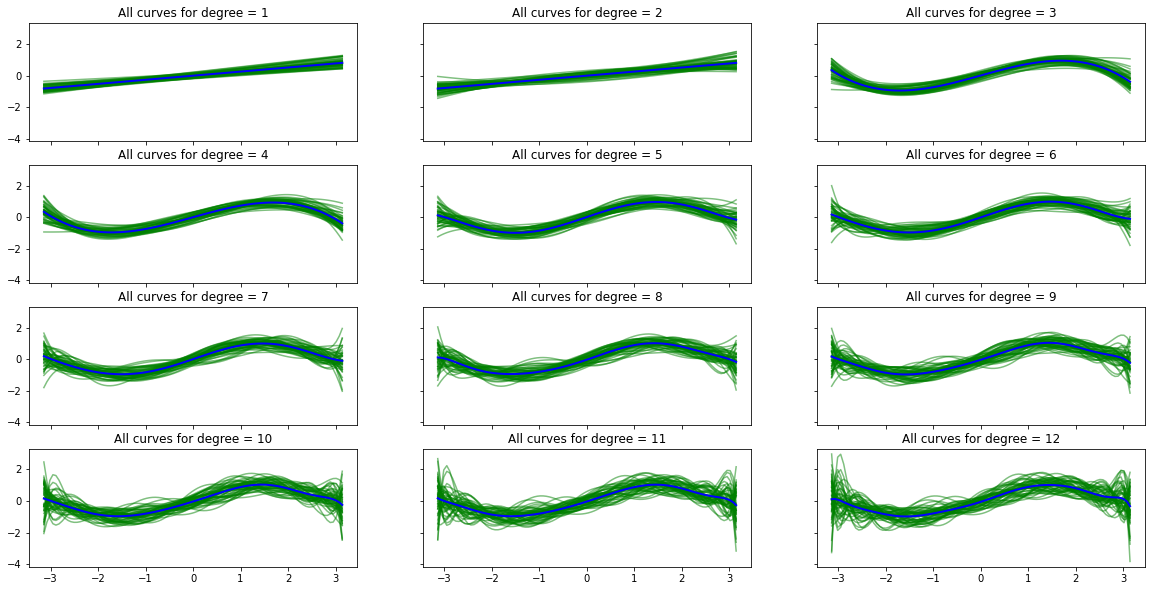

In [5]:
# show all prediction curves for each polynomial degree
# along with the mean curve
import math

plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(math.ceil(MAX_POLY/3), 3, sharex=True, sharey=True)

for d in range(MAX_POLY):
    ax = axs[d//3, d%3]
    for k in range(NUM_DATASETS):
        ax.plot(x_axis, prediction_curves[:,k,d], color='green', alpha=0.5)
        
    ax.plot(x_axis, prediction_curves[:,:,d].mean(axis=1), color='blue', linewidth=2.0)    
    ax.set_title("All curves for degree = %d" % (d+1))
    
plt.show()

In [6]:
# calculate the squared bias
avg_train_prediction = np.zeros((Ntrain, MAX_POLY))
squared_bias = np.zeros(MAX_POLY)
f_Xtrain = f_X[:Ntrain]
for d in range(MAX_POLY):
    for i in range(Ntrain):
        avg_train_prediction[i,d] = train_predictions[i,:,d].mean()
    squared_bias[d] = ((avg_train_prediction[:,d] - f_Xtrain)**2).mean()
    
# calculate the variance
variances = np.zeros((Ntrain, MAX_POLY))
for d in range(MAX_POLY):
    for i in range(Ntrain):
        delta = train_predictions[i,:,d] - avg_train_prediction[i,d]
        variances[i,d] = delta.dot(delta) / len(delta)
    variance = variances.mean(axis=0)

Let's draw the picture about it:

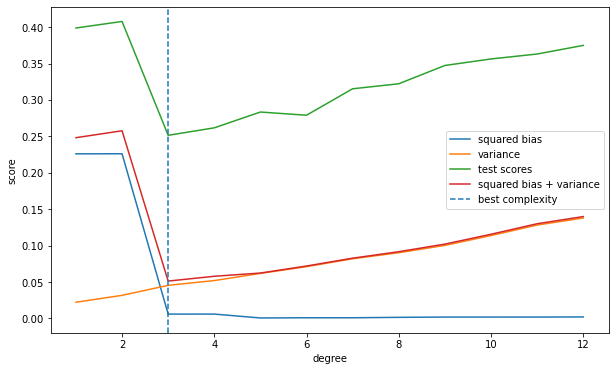

In [7]:
# make bias-variance plots
plt.rcParams["figure.figsize"] = (10,6)
degrees = np.arange(MAX_POLY) + 1
best_degree = np.argmin(test_scores.mean(axis=0)) + 1
plt.plot(degrees, squared_bias, label='squared bias')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.plot(degrees, squared_bias + variance, label='squared bias + variance')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.xlabel('degree')
plt.ylabel('score')
plt.legend()
plt.show()

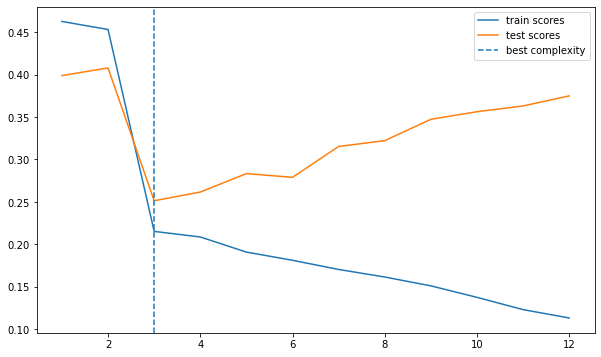

In [8]:
# train score vs test score
plt.plot(degrees, train_scores.mean(axis=0), label='train scores')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()

<a id='seg5'></a>
## <font color='darkblue'>K-Nearest Neighbor and Decision Tree Demo</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6239856#overview)) This part will use KNN to demonstrate high bias/low variance and high variance/low bias situations. The code is from [knn_dt_demo.py](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/supervised_class2/knn_dt_demo.py).

### <font color='darkgreen'>Regression</font>

In [14]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.utils import shuffle

N = 50
Ntrain = 20

# create the data
X = np.linspace(0, 2*np.pi, N).reshape(N, 1)
Y = np.sin(3*X)
X, Y = shuffle(X, Y)

Xtrain = X[:Ntrain]
Ytrain = Y[:Ntrain]

Firstly, let's check <b>[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)</b> - low bias, high variance:

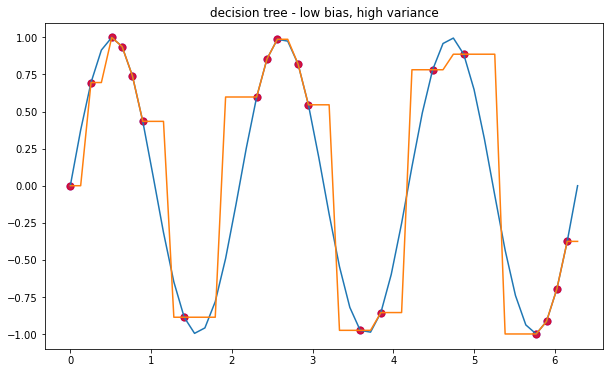

In [15]:
model = DecisionTreeRegressor() # default max_depth=None
model.fit(Xtrain, Ytrain)

T = 50
Xaxis = np.linspace(0, 2*np.pi, T)
Yaxis = np.sin(3*Xaxis)

plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='red')
plt.title("decision tree - low bias, high variance")

plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.show()

Now is <b>[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)</b> - high bias, low variance:

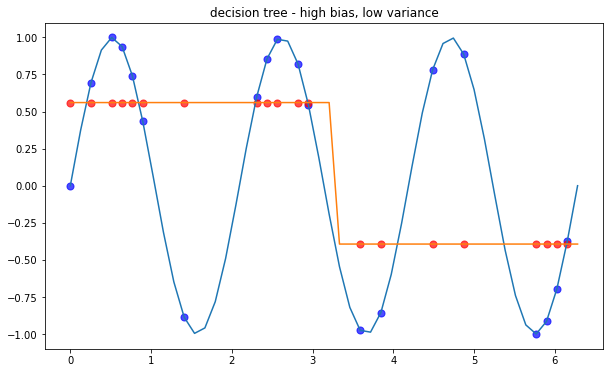

In [16]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(Xtrain, Ytrain)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='red')
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.title("decision tree - high bias, low variance")
plt.show()

For decision tree: 
* Higher depth <-> High variance & Low bias
* Smaller depth <-> High bias & Low variance

Next, let's check <b>[KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)</b> - low bias, high variance

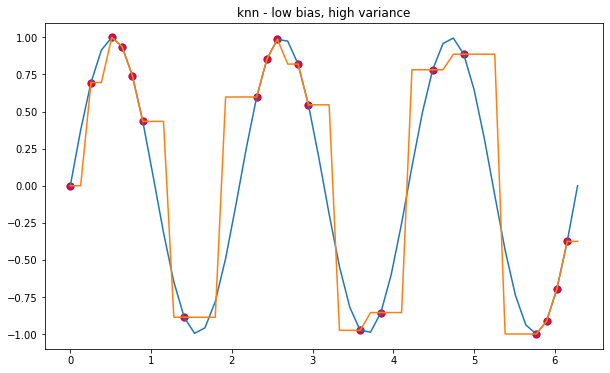

In [19]:
model = KNeighborsRegressor(n_neighbors=1)
model.fit(Xtrain, Ytrain)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='red')
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.title("knn - low bias, high variance")
plt.show()

Then for <b>[KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)</b> - high bias, low variance

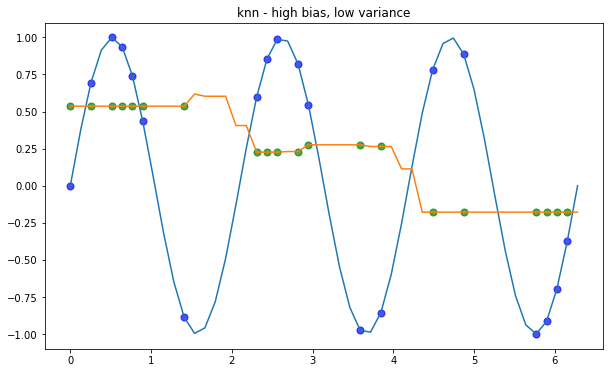

In [18]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(Xtrain, Ytrain)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='green')
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.title("knn - high bias, low variance")
plt.show()

For <b>[KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)</b>:
* Smaller `n_neighbors`: High variance & Low bias 
* Higher `n_neighbors`: High bias & Low variance    

### <font color='green'>Classification</font>
Let's examine how Bias/Variance impact classification problem.

In [23]:
N = 100
D = 2
X = np.random.randn(N, D)
X[:N//2] += np.array([1, 1])    # For the last 100 points, center them at (1,1)
X[N//2:] += np.array([-1, -1])  # For the first 100 points, center them at (-1, -1)

Y = np.array([0]*(N//2) + [1]*(N//2))

def plot_decision_boundary(ax, X, model):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap=plt.cm.Paired)

Let's check the data first:

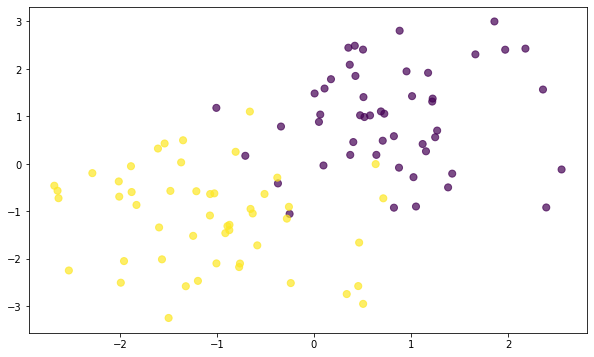

In [21]:
# look at the data
plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plt.show()

For <b>[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)</b>:

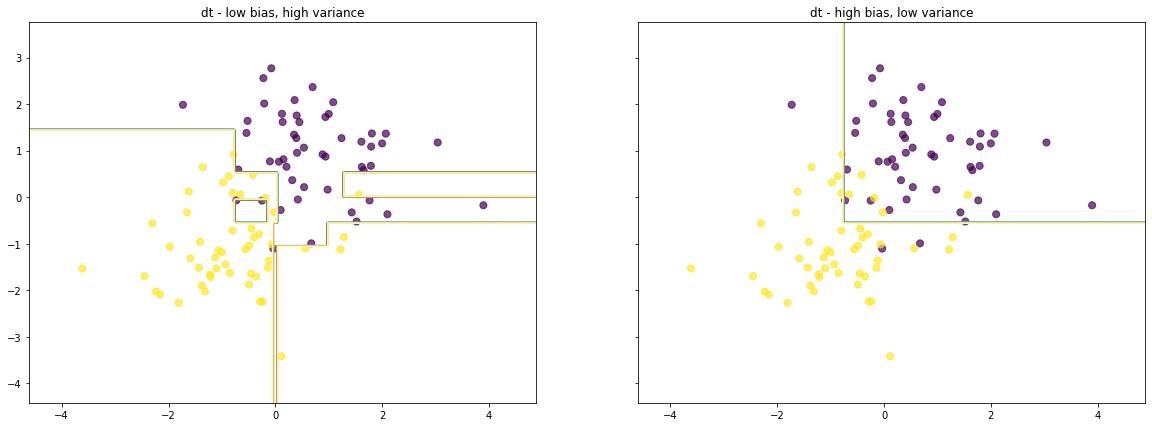

In [34]:
plt.rcParams["figure.figsize"] = (20,7)
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

# dt - low bias, high variance
ax = axs[0]
model = DecisionTreeClassifier()
model.fit(X, Y)

ax.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plot_decision_boundary(ax, X, model)
ax.set_title("dt - low bias, high variance")

# dt - high bias, low variance
ax = axs[1]
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, Y)

ax.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plot_decision_boundary(ax, X, model)
ax.set_title("dt - high bias, low variance")

plt.show()

For <b>[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)</b>:

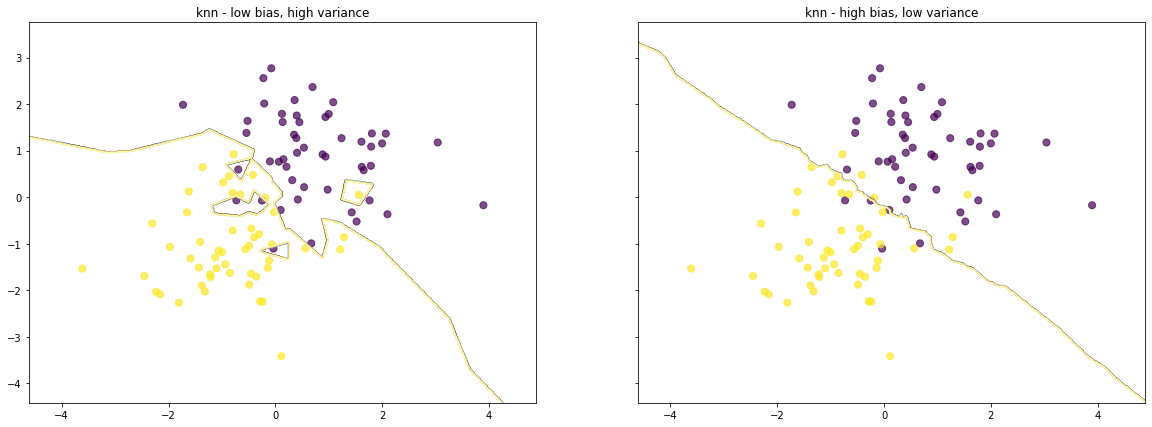

In [33]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

# knn - low bias, high variance
ax = axs[0]
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, Y)

ax.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plot_decision_boundary(ax, X, model)
ax.set_title("knn - low bias, high variance")

# knn - high bias, low variance
ax = axs[1]
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X, Y)

ax.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plot_decision_boundary(ax, X, model)
ax.set_title("knn - high bias, low variance")

plt.show()

<a id='seg6'></a>
## <font color='darkblue'>Cross-Validation as a Method for Optimizing Model Ccomplexity</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6239858#overview))

### <font color='darkgreen'>Cross-Validation</font>
* Cross-validation can help us optimize the bias-variance trade-off
* We've already looked at cross-validation as a way of choosing hyperparameters
* <b><font color='darkred'>Motivation: we didn't just want good training error, we wanted good generalization error too.</font></b>
* In polynomial regression example, we saw that test error coincides with sum of bias^2 + variance
* So by optimizing test error, we optimize bias-variance as well
* Before: used cross-validation to find best hyperparameters
* Now: use cross-validation to find best model complexity (which is actually just choosing hyperparameters)
* Before: used cross-validation to optimize generalization error
* Now: use cross-validation to optimize bias^2 + variance (corresponds to generalization error)
* Just a slightly different perspective, we are still doing the same thing.

### <font>K-Fold Cross-Validation</font>
* <b>[K-Fold Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation)</b> is a popular way to choose hyperparameters
* Split data into K parts (typical values for K=5,8,10)
* Loop K times
* In each iteration, take 1 part out (use it for validation), use the rest for training. Ex. for K=3:
![KF](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/KfoldCV.gif/350px-KfoldCV.gif)

Below is pseudo code for K-Fold Cross-Validation:
```python
scores = []
sz = N / K
for i in range(K):
    Xvalid, Yvalid = X[i*sz:(i+1)*sz], Y[i*sz: (i+1)*sz]
    Xtrain, Ytrain = concat(X[0: i*sz], X[(i+1)*sz:N]), concat(Y[0: i*sz], Y[(i+1)*sz:N])
    model.fit(Xtrain, Ytrain)
    scores.append(model.score(Xvalid, Yvalid))
return scores
```
* Returns K different scores (accuracies)
* Can simply use the mean
* Can also use <b>[statistic testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)</b> to check if one hyperparameter setting is "statistically significantly" better than another.

### <font color='darkgreen'>Scikit-learn</font>
* SKLearn version requires you to conform to [their API](https://scikit-learn.org/stable/modules/cross_validation.html)
* fit(), predict() and score() functions + more
* Roll your own cross-validation may be easier if you're rolling your own model.
```python
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lasso, X, y, cv=K)
```

### <font color='darkgreen'>Leave-One-Out Cross-Validation</font>
* <b>[LOO](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Leave-one-out_cross-validation)</b> is a special variation we'll see again later.
* K=N and we train on N-1 instances and test on 1 instance. Do this N times for all instances. 